In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpo3ab_8x7GP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Brain_MRI_Segmentation/Brain_MRI_Segmentation.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/Brain_MRI_Segmentation/Brain_MRI_Segmentation_masks.npy')

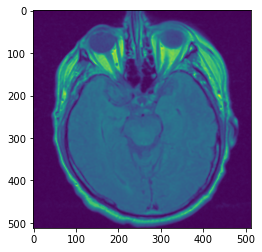

In [5]:
plt.imshow(images[1])

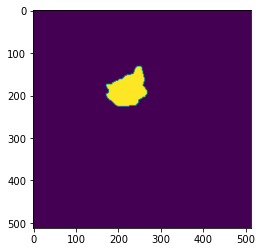

In [6]:
plt.imshow(masks[1])

In [7]:
len(images)

3929

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=3929, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [ ]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
4/4 [==============================] - 23s 3s/step - loss: -0.8509 - dice_coeff: 0.9650 - val_loss: -0.2758 - val_dice_coeff: 0.9598
Epoch 2/100
4/4 [==============================] - 4s 1s/step - loss: -5.2690 - dice_coeff: 1.2588 - val_loss: -0.1405 - val_dice_coeff: 0.9391
Epoch 3/100
4/4 [==============================] - 4s 1s/step - loss: -8.5947 - dice_coeff: 1.4915 - val_loss: -0.0114 - val_dice_coeff: 0.9191
Epoch 4/100
4/4 [==============================] - 4s 1s/step - loss: -11.4395 - dice_coeff: 1.2043 - val_loss: 0.0550 - val_dice_coeff: 0.9086
Epoch 5/100
4/4 [==============================] - 5s 1s/step - loss: -15.6481 - dice_coeff: 1.1756 - val_loss: 0.1331 - val_dice_coeff: 0.8962
Epoch 6/100
4/4 [==============================] - 5s 1s/step - loss: -17.5799 - dice_coeff: 1.1996 - val_loss: 0.1925 - val_dice_coeff: 0.8867
Epoch 7/100
4/4 [==============================] - 4s 1s/step - loss: -19.0768 - dice_coeff: 1.3234 - val_loss: 0.1191 - val

Replacing 40 from 120 !
D_relabeled_ 40
selected_ids ['85ab021b-4005-48b4-b59c-bb47c0ec07c7', '0ded27b1-4eeb-4f79-9d70-1e81c47ca023', '04ef7ca4-57c1-4523-b49b-c80dfe21b956', '7bc8fbfc-f2ce-4a49-b9b1-2980eaf97f43', 'dd989969-397d-4904-9bae-e941f6a1aac0', '42a57999-7d5f-4f22-ab41-7741354deebc', 'c96c3069-05fc-4037-b92a-11d4d4c45222', '871fcf01-5131-4cd5-8752-6347297cffd2', '71398d97-dcf0-49ea-b44c-572cac644aca', '14c5a98b-a83b-406b-9379-3cc10e528044', '572ec360-6eab-4d57-a94a-06a5d3cc7ca2', '8ba6e5fd-3d00-49b4-a4a5-ec9e3214ee6d', 'a6e6c5c2-3a2a-4a4e-b359-1b3af8ce0296', '5d4e4e9a-a3b7-4c9c-80ce-9a7e2bed7794', '44ad9aad-e3dc-4f4d-adac-96bca14a4cad', '88706009-abd3-4266-bcd4-8a197ae725d1', 'bf46ac7d-c799-4b05-a5d5-a964907dbc07', '396617ba-e248-4f43-a285-fa771c0c81cc', 'e906bab5-491c-4f42-9cfb-f33013142b87', '6d1574e9-2825-4828-9c18-187f99bfa129', '8bd7bcbc-9dca-40e5-bfa8-c2c8ab3ec27d', 'dc89c897-6650-46ea-8854-07c756142f59', 'a7371db8-12ed-4085-9b0e-a268e4891dc4', '1c0a2924-69f4-4f47-9a05-3

In [ ]:
R.classifier_scores

In [ ]:
R.discriminator_scores

In [ ]:
R.plot()